<a href="https://colab.research.google.com/github/garciamilord/Data-Compression-SVD-/blob/main/datacompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [30]:
! wget https://raw.githubusercontent.com/garciamilord/Data-Compression-SVD-/main/braidselfie.jpg
# https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
# github.com/garciamilord/NameandColorWebApp/blob/master/assets/multicolorgopher.jpeg

--2021-12-09 04:18:14--  https://raw.githubusercontent.com/garciamilord/Data-Compression-SVD-/main/braidselfie.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40050 (39K) [image/jpeg]
Saving to: ‘braidselfie.jpg’

braidselfie.jpg     100%[===================>]  39.11K  --.-KB/s    in 0s      

2021-12-09 04:18:15 (109 MB/s) - ‘braidselfie.jpg’ saved [40050/40050]



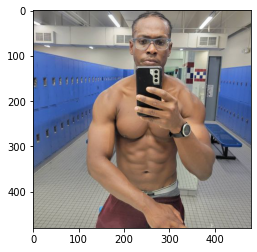

In [31]:
img = Image.open('braidselfie.jpg')
_= plt.imshow(img)

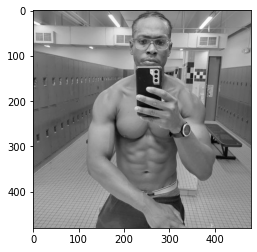

In [32]:
imggray = img.convert('LA')
_= plt.imshow(imggray)

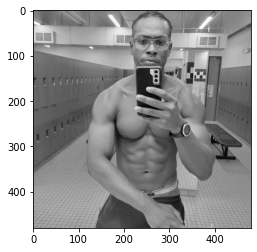

In [33]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_=plt.imshow(imgmat, cmap='gray')

In [34]:
U, sigma, V =np.linalg.svd(imgmat)

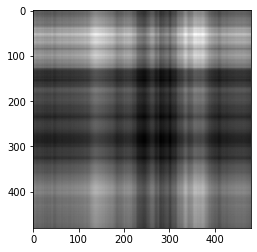

In [35]:
reconstimg = np.matrix(U[:,:1]) * np.diag(sigma[:1]) * np.matrix(V[:1,:])
_=plt.imshow(reconstimg, cmap='gray')

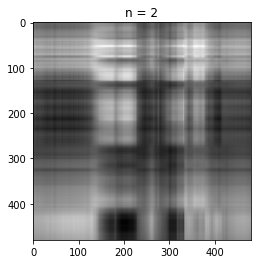

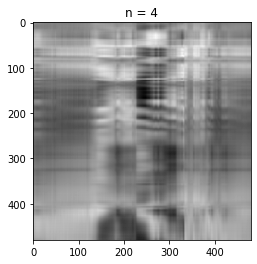

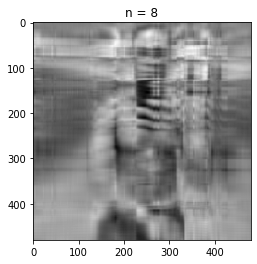

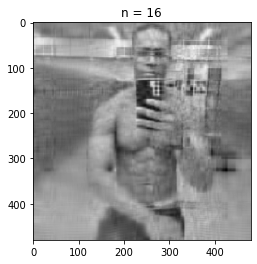

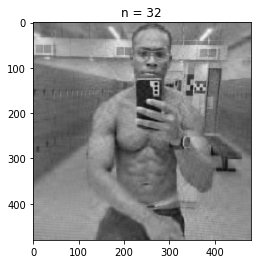

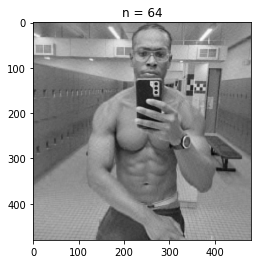

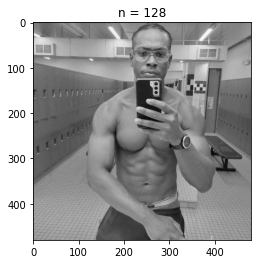

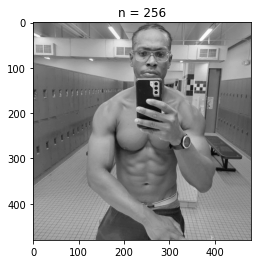

In [47]:
for i in [2,4,8,16,32,64,128,256]:
  reconstimg = np.matrix(U[:,:i]) * np.diag(sigma[:i]) * np.matrix(V[:i,:])
  plt.imshow(reconstimg, cmap='gray')
  title ="n = %s" % i
  plt.title(title)
  plt.show()

In [42]:
imgmat.shape

(480, 480)

In [27]:
full_rep = 480*480
full_rep

153120

In [44]:
svd64_rep = 256 * 480 +256 +256 *480
svd64_rep

246016

In [45]:
svd64_rep/full_rep

1.606687565308255